Name: Andrew Dragoslavic

NJIT UCID: amd83

Email Address: amd83@njit.edu

10/10/2024

Professor: Yasser Abduallah

CS 634 101 Data Mining

#### **Abstract**:
In this project I looked into Apriori Algorithm, this is a basic concept within data mining and explores the use of association rules in order to find common patterns within transactions. By implementing the model with the use of data mining tools and concepts I was able to analyze the effectiveness of the custom Apriori model and get comparisons to built in python packages and see the insights they are able to provide regarding transaction patterns.

#### **Introduction**:

Data mining is an integral part of modern day data science and looks into finding patterns and association rules within large amounts of data. This project in specifically looks into Association Rule Mining to find patterns in transactional datasets and more specifically implements the Apriori Algorithm and its importance within industry. In this report we will take a deep dive into the algorithm and the underlying concepts being used.

The goal of the Apriori Algorithm is to find association rules within a set of transactions by finding which items show up the most and surpass a certain threshold. This threshold was given by the user input support and confidence. From there we looked at the count of each item and whichever fall below the threshold get removed from the list. This is a brute force method to find frequent items within a large dataset and generate association rules within the data. This is done by starting with 1 itemsets through k itemsets and looking at how many times the subset shows up within the data and removing those subest that are below the defined threshold. 

In the code below I implemented a custom Apriori Algorithm to multiple custom datasets based on different stores and looked to find frequent itemsets and association rules using the following steps
* Load the datasets from CSV files and reformat the transactions list to remove any inconsistentcies
* Parsing the data from the CSV files to get a count of the number of each of the items in the list
* Comparing this initial candidate list with the input support and generating the next candidate itemset based on which items remain
* Once all the frequent itemsets are found calculate the confidence of each and compare to the user input confidence and generate rules for those above the threshold

#### **Core Concepts**
* **Frequent Itemsets**
  * The Apriori Algorithm looks into finding frequent itemsets within the data which is items that occur within the same transaction. It does this by checking how many transactions a subset occurs in and depending on the support and confidence will be labeled as a frequent itemset. This is very useful in retail to find items commonly bought together and customer purchase patterns.

* **Support and Confidence**
  * Support and Confidence are user set variables in the Apriori Algorithm where support measure how often a given itemset shows up within the entire dataset and confidence is measure showing how likely two items are to be pruchased together

* **Generating Assocation Rules**
  * By generating the assocaiton rules from the frequent itemesets found we are able to determine the likeliness that purchasing one item will lead to buying the other item which helps in industry with customers behaviors and purchase patterns

#### **Project Outline**

* **Data Loading and Preprocessing**
  * We began by getting transaction data from different stores and using this as our itemset data. Each transaction consisted of a list of different items that were purchased together. This data was preprocessed so that it could be used properly and identified correctly within the algorithm. This was done by formatting each transaction into a set and removing and unnecessary white space.
* **Minimum Support and Confidence**
  * The support and confidence are user defined input each time the algorithm is run and is used to remove patterns that are decided to be not relevant enough to keep for later stage of the algorithm
* **Candidate Itemsets**
  * The base of the Apriori Algorithm revolves around generating candidate itemsets and seeing if any of them occur enough to surpass the threshold set by the support. Starting at the 1-itemsets and keeping whichever occur enough we then move on 2-itemsets which are made by running combinations on the remaining items from the previous candidates. We continue this process until there are no longer any k-itemsets that are above the support threshold.
* **Support and Confidence Calculations**
  * **Support**
    * The support for each itemset from the candidates is found by getting a count of how many times each given itemset shows up throughout all the transasctions. Once this is found it is compared with the minimum threshold and either kept or discarded.
  * **Confidence**
    * The confidence is used to show us the likelihood that two items are purcahsed together and the strength of the two items association. This is calculated by using the support of the joint itemset and the support of it's individual items.
* **Association Rules**
  * Items that are above both the support and confidence threshold are taken into account and are output at the end of execution to determine which sets are most likely to be bought together. 

#### **Results**

From this project I was able to look into the inner workings of the Apriori Algorithm and see how association rules work in depth with transactional data. I was able to develop my own version of the Apriori Algorithm and see how successful it was in determining the most common itemsets. In addition to this we were able to look into the effect that support and confidence have on the outputs of the generated association rules. Based on how high or low the support and confidence were set to had a big effect on what the frequent itemsets were and how many association rules were generated. Lastly I was able to compare this to built in Python packages which allow the use of the Apriori algorithm and Frequent Pattern Tree algorithm and ensure that my algorithm was able to generate the same results. 

#### **Conclusion**

In conclusion this project looks into the data mining concepts relating to Apriori Algorithm and also compares it with the Frequent Pattern Tree Algorithm. From this we were able to look into the algorithm in a step by step approach and attempt to implement it in the most efficient and effective way possible. We were able to see the steps that go into extracting association rules including preprocessing, support, confidence, and candidate itemsets. By being able to develop our own brute force approach we were able to see how the algorithm works at each stage and understand one of the core concept of data mining by getting a hands on experience with association rules and understand how it is used at an industry level with transactional data and see the meaningful patterns and helpful information that can be extracted from it.

#### **CSV Files**

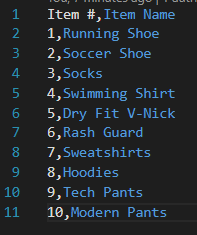

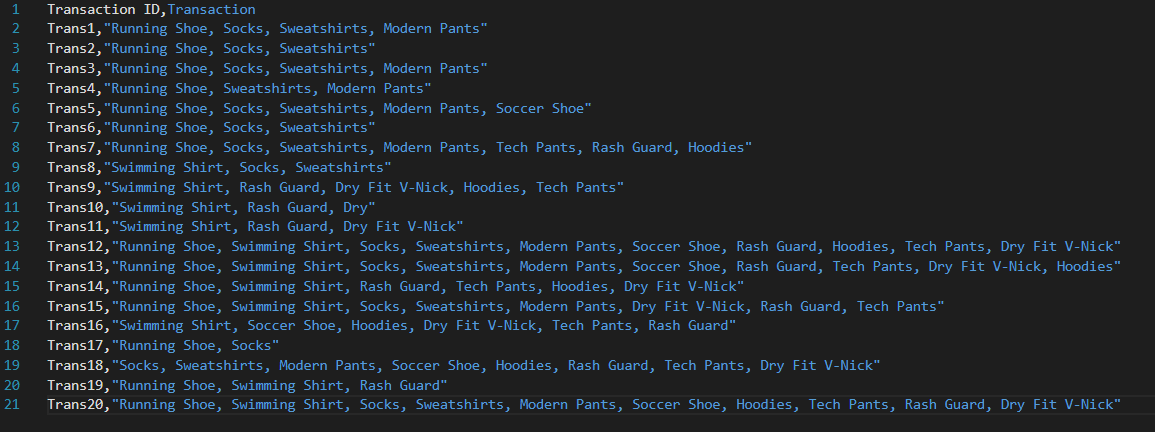

Import combinations for making the candidate itemsets and pandas to load in the the csv files

In [168]:
from itertools import combinations
import pandas as pd

Convert to set function responsible for making each list of items into a set and separating them by the commas and removing any extra whitespace

In [169]:
def convertToSet(transactions):
    return set(item.strip() for item in transactions.split(","))

Load in the csv file with the transactions and items and apply the function and then specify the support and confidence values

In [170]:
transactions = pd.read_csv("5/Transactions.csv")
transactions["Transaction"] = transactions["Transaction"].apply(convertToSet)
itemset = pd.read_csv("5/Items.csv")
support = 50
confidence = 90
threshold = (support / 100) * len(transactions)

Create a list of all the items from the initial itemset and use this to make the k-itemsets. For each candidate itemset go through the transactions and see if that subset exist and if so get a sum of it and add it to the itemset dictionary. Once all the combinations have been exhausted and summed up, whichever are below the threshold remove from the itemset dictionary. 

In [171]:
def generateItemsets(prevItemsets, transactions, threshold, k):
    itemsets = {}
    itemList = list(prevItemsets.keys())

    for combo in combinations(itemList, k):
        combo = set(combo)
        count = sum(
            1
            for transaction in transactions["Transaction"]
            if combo.issubset(transaction)
        )
        if count >= threshold:
            itemsets[tuple(combo)] = count
    return itemsets

To generate the rules we go through the keys of the itemset dictionary being the items in it and check if the length of it is more than one. If not we ignore it since there is no rule to make for it. If it is more tho we run a for loop from 1 to the length of the itemset where the current i determines the combination being made and whatever combinations are made from that we make the start of the rule and to get the other part of the rule we subtract the combo from the itemset. Once we have this we then get the support for the start part of the rule by again going through the transactions and finding where it appears and we do this for the itemset as a whole as well. This is done for us to be able to calculate the confidence of each association rule. Once we have the supports we compare the calculated confidence to the minimum required and if it meets the requiremnt we output the rule. 

In [172]:
def generateRules(itemsets, transactions, min_support, min_confidence):
    count = 0
    # Go through the final dictionary and if the length is only one item ignore it
    # If the length is more than two generate all the possible combinations
    for itemset in itemsets.keys():
        k = len(itemset)
        if k < 2:
            continue
        for i in range(1, k):
            for combo in combinations(itemset, i):
                start = set(combo)
                itemset = set(itemset)
                res = itemset - start
                start_support = sum(
                    1
                    for transaction in transactions["Transaction"]
                    if start.issubset(transaction)
                )
                rule_support = sum(
                    1
                    for transaction in transactions["Transaction"]
                    if itemset.issubset(transaction)
                )
                confidence = rule_support / start_support
                if confidence >= min_confidence / 100:
                    count += 1
                    print(
                        f"\nRule {count}: {', '.join(start)} -> {', '.join(res)} \nConfidence: {round((confidence * 100),2)}% \nSupport: {round(((rule_support/len(transactions))*100),2)}%"
                    )

In order to be able to generate the frequent itemsets we then had to take the resulting dictionary and create a string to hold them all. We did this by going one itemset at a time and appending them to a list. Once we had a list filled with all the itemsets we then iterated through the list in order to construct the string by putting each item in curly braces and separating them with commas. 

In [173]:
def generateFrequentItems(itemsets):
    freq = []
    freqString = """\nFrequent Items: """
    for itemset in itemsets:
        freq.append(itemset)
    for i in range(len(freq)):
        freqString += "{" + ", ".join(freq[i]) + "}"
        if i < len(freq) - 1:
            freqString += ", "
    return freqString

Lastly in the apriori function we go through the transactions and get a count of each of the items. Once we have that we then compare this with the threshold to see what items are left. With these remaining items we then run the generateItemsets function to get other possible k-itemsets and add them to the results dictionary. And after we have found all valid itemsets we then use them to call the generateRules function

In [174]:
def apriori(transactions, min_support, min_confidence):
    itemsets = {}
    results = {}

    for index, row in transactions.iterrows():
        for item in row["Transaction"]:
            itemsets[item] = itemsets.get(item, 0) + 1

    threshold = (min_support / 100) * len(transactions)
    itemsets = {k: v for k, v in itemsets.items() if v >= threshold}
    # results.update(itemsets)
    k = 1

    while True:
        new = generateItemsets(itemsets, transactions, threshold, k)
        if not new:
            break
        results.update(new)
        k += 1
    generateRules(results, transactions, min_support, min_confidence)

    return results

With the results from the Apriori function we save them into results and use this to run the generateFrequentItems function

In [175]:
results = apriori(transactions, support, confidence)
print(generateFrequentItems(results))


Rule 1: Modern Pants -> Sweatshirts 
Confidence: 100.0% 
Support: 50.0%

Rule 2: Sweatshirts -> Socks 
Confidence: 92.31% 
Support: 60.0%

Rule 3: Socks -> Sweatshirts 
Confidence: 92.31% 
Support: 60.0%

Rule 4: Swimming Shirt -> Rash Guard 
Confidence: 90.91% 
Support: 50.0%

Rule 5: Running Shoe, Sweatshirts -> Socks 
Confidence: 90.91% 
Support: 50.0%

Rule 6: Running Shoe, Socks -> Sweatshirts 
Confidence: 90.91% 
Support: 50.0%

Frequent Items: {Modern Pants}, {Running Shoe}, {Sweatshirts}, {Socks}, {Rash Guard}, {Swimming Shirt}, {Modern Pants, Sweatshirts}, {Running Shoe, Sweatshirts}, {Running Shoe, Socks}, {Sweatshirts, Socks}, {Rash Guard, Swimming Shirt}, {Running Shoe, Sweatshirts, Socks}


We then compare the results from our brute force approach by using built in packages for the Apriori and Frequent Pattern Tree Algorithms. The first step was to reformat the data into a 2D array so that it can be read by the algorithms

In [176]:
items = pd.read_csv('5/Items.csv')
transactions = pd.read_csv('5/Transactions.csv')
itemsList = []
for index, row in transactions.iterrows():
    itemSet = [item.strip() for item in row['Transaction'].split(',')]
    itemsList.append(itemSet)

Once the data was properly formatted we then intalled the need packages from mlxtend such as apriori, association rules, fpgrowth, and TransactionEncoder. With this we initialized an encoder and fit the itemlist into a dataframe to be read by the algorithms. Once this was then we ran the function on both and extracted the necessary information being the antecedent, consequents, and confidence for each of the rules and we output them to show that the brute force approach gets the same results as the built in packages

In [177]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

encoder = TransactionEncoder()
onehot = encoder.fit(itemsList).transform(itemsList)
df = pd.DataFrame(onehot, columns = encoder.columns_)

aprioriItemsets = apriori(df, min_support=0.50, use_colnames=True)
fpgrowthItemsets = fpgrowth(df, min_support=0.50, use_colnames=True)

# Generate the association rules
aprioriRules = association_rules(aprioriItemsets, metric="confidence", min_threshold=0.9)
fpgrowthRules = association_rules(fpgrowthItemsets, metric="confidence", min_threshold = 0.9)
for index, row in aprioriRules.iterrows():
    antecedent_str = row['antecedents']
    consequent_str = row['consequents']
    confidence_str = row['confidence']
    
    print(f"Rule {index + 1}: [{antecedent_str}, {consequent_str}, {confidence_str}]\n")

Rule 1: [frozenset({'Modern Pants'}), frozenset({'Sweatshirts'}), 1.0]

Rule 2: [frozenset({'Swimming Shirt'}), frozenset({'Rash Guard'}), 0.9090909090909091]

Rule 3: [frozenset({'Sweatshirts'}), frozenset({'Socks'}), 0.923076923076923]

Rule 4: [frozenset({'Socks'}), frozenset({'Sweatshirts'}), 0.923076923076923]

Rule 5: [frozenset({'Running Shoe', 'Sweatshirts'}), frozenset({'Socks'}), 0.9090909090909091]

Rule 6: [frozenset({'Running Shoe', 'Socks'}), frozenset({'Sweatshirts'}), 0.9090909090909091]



In [178]:
for index, row in fpgrowthRules.iterrows():
    antecedent_str = row['antecedents']
    consequent_str = row['consequents']
    confidence_str = row['confidence']
    
    print(f"Rule {index + 1}: [{antecedent_str}, {consequent_str}, {confidence_str}]\n")

Rule 1: [frozenset({'Sweatshirts'}), frozenset({'Socks'}), 0.923076923076923]

Rule 2: [frozenset({'Socks'}), frozenset({'Sweatshirts'}), 0.923076923076923]

Rule 3: [frozenset({'Running Shoe', 'Sweatshirts'}), frozenset({'Socks'}), 0.9090909090909091]

Rule 4: [frozenset({'Running Shoe', 'Socks'}), frozenset({'Sweatshirts'}), 0.9090909090909091]

Rule 5: [frozenset({'Modern Pants'}), frozenset({'Sweatshirts'}), 1.0]

Rule 6: [frozenset({'Swimming Shirt'}), frozenset({'Rash Guard'}), 0.9090909090909091]



#### **Other**

The source code (.py file) and data sets (.csv files) will be attached in zip file

Link to GitHub Repository

https://github.com/andrew-dragoslavic/CS634-Project1
